# Modelling

In [6]:
import pandas as pd
import sklearn
import numpy as np
import torch
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
import sklearn.feature_selection
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.naive_bayes import MultinomialNB

from sklearn.svm import SVC
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

from scipy.io import loadmat
import os
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier
from sklearn.model_selection import cross_val_score, KFold
from sklearn.neural_network import MLPClassifier,MLPRegressor
from sklearn.datasets import load_iris
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report

In [7]:
df=pd.read_csv("C:/Users/jatin/OneDrive/Desktop/merged_data_labeled.csv")

In [8]:
df.head()

,X,Y,Z,EDA,HR,TEMP,id,datetime,label
0,-22.0,-43.0,127.0,21.941885,82.67,36.49,5C,2020-04-14 22:31:00.000000000,1.0
1,-22.0,-43.0,127.0,21.941885,82.67,36.49,5C,2020-04-14 22:31:00.031249920,1.0
2,-22.0,-43.0,127.0,21.941885,82.67,36.49,5C,2020-04-14 22:31:00.062500096,1.0
3,-22.0,-43.0,127.0,21.941885,82.67,36.49,5C,2020-04-14 22:31:00.093750016,1.0
4,-22.0,-43.0,127.0,21.941885,82.67,36.49,5C,2020-04-14 22:31:00.124999936,1.0


In [9]:
# From PCA we know temp and hr are most contibuting to the output
#
a=np.array(df["label"])
d={}
for i in range(len(a)):
    if(a[i] not in d):
        d[a[i]]=0
    else:
        d[a[i]]+=1
print("Percentage of label 0:",d[0]*100/len(df))
print("Percentage of label 1:",d[1]*100/len(df))
print("Percentage of label 2:",d[2]*100/len(df))

Percentage of label 0: 27.669675551936297
Percentage of label 1: 17.48251176465027
Percentage of label 2: 54.847736028256115


In [10]:
X=np.array(df.loc[:,["X","Y","Z","EDA","HR","TEMP"]])
y=np.array(df.loc[:,["label"]]).ravel()
lst=[df]
del lst
scaler=StandardScaler()
scaler.fit(X,axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
#start modeliing first with random forest classifiers
#train_test_split



model = RandomForestClassifier(n_estimators=100,verbose=10,n_jobs=10)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("accuracy:", accuracy)
    
# Calculating the precision score
precision = precision_score(y_test, y_pred,labels=[0,1,2],average="macro")
print("precision:", precision)
    
# Calculating the recall score
recall = recall_score(y_test, y_pred,labels=[0,1,2],average="macro")
print("recall:", recall)
    
# Calculatig the F1 score
f1 = f1_score(y_test, y_pred,labels=[0,1,2],average="macro")
print("f1:", f1)

[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.


building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100


[Parallel(n_jobs=10)]: Done   5 tasks      | elapsed:   16.7s


building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100


[Parallel(n_jobs=10)]: Done  12 tasks      | elapsed:   32.0s


building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100


[Parallel(n_jobs=10)]: Done  21 tasks      | elapsed:   47.3s


building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100


[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:   52.3s


building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100


[Parallel(n_jobs=10)]: Done  41 tasks      | elapsed:  1.3min


building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60 of 100
building tree 61 of 100


[Parallel(n_jobs=10)]: Done  52 tasks      | elapsed:  1.6min


building tree 62 of 100
building tree 63 of 100
building tree 64 of 100
building tree 65 of 100
building tree 66 of 100
building tree 67 of 100
building tree 68 of 100
building tree 69 of 100
building tree 70 of 100
building tree 71 of 100
building tree 72 of 100
building tree 73 of 100
building tree 74 of 100
building tree 75 of 100
building tree 76 of 100


[Parallel(n_jobs=10)]: Done  65 tasks      | elapsed:  1.9min


building tree 77 of 100
building tree 78 of 100
building tree 79 of 100
building tree 80 of 100
building tree 81 of 100
building tree 82 of 100building tree 83 of 100

building tree 84 of 100
building tree 85 of 100
building tree 86 of 100
building tree 87 of 100


[Parallel(n_jobs=10)]: Done  78 tasks      | elapsed:  2.2min


building tree 88 of 100
building tree 89 of 100
building tree 90 of 100
building tree 91 of 100
building tree 92 of 100building tree 93 of 100

building tree 94 of 100
building tree 95 of 100
building tree 96 of 100
building tree 97 of 100
building tree 98 of 100
building tree 99 of 100
building tree 100 of 100


[Parallel(n_jobs=10)]: Done  92 out of 100 | elapsed:  2.7min remaining:   14.0s
[Parallel(n_jobs=10)]: Done 100 out of 100 | elapsed:  2.7min finished
[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   5 tasks      | elapsed:    0.2s
[Parallel(n_jobs=10)]: Done  12 tasks      | elapsed:    0.5s
[Parallel(n_jobs=10)]: Done  21 tasks      | elapsed:    0.8s
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    0.9s
[Parallel(n_jobs=10)]: Done  41 tasks      | elapsed:    1.4s
[Parallel(n_jobs=10)]: Done  52 tasks      | elapsed:    1.7s
[Parallel(n_jobs=10)]: Done  65 tasks      | elapsed:    2.1s
[Parallel(n_jobs=10)]: Done  78 tasks      | elapsed:    2.4s
[Parallel(n_jobs=10)]: Done  92 out of 100 | elapsed:    2.9s remaining:    0.2s
[Parallel(n_jobs=10)]: Done 100 out of 100 | elapsed:    3.0s finished


accuracy: 0.9980644592559091
precision: 0.9981294351229817
recall: 0.9973965288440172
f1: 0.9977616174226349


In [12]:
confusion_matrix(y_test,y_pred,normalize='true')

array([[9.98678357e-01, 3.13141826e-04, 1.00850088e-03],
       [7.65020891e-04, 9.94688990e-01, 4.54598953e-03],
       [8.79828876e-04, 2.97931471e-04, 9.98822240e-01]])

[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   5 tasks      | elapsed:    0.2s
[Parallel(n_jobs=10)]: Done  12 tasks      | elapsed:    0.5s
[Parallel(n_jobs=10)]: Done  21 tasks      | elapsed:    0.8s
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    0.9s
[Parallel(n_jobs=10)]: Done  41 tasks      | elapsed:    1.4s
[Parallel(n_jobs=10)]: Done  52 tasks      | elapsed:    1.8s
[Parallel(n_jobs=10)]: Done  65 tasks      | elapsed:    2.1s
[Parallel(n_jobs=10)]: Done  78 tasks      | elapsed:    2.5s
[Parallel(n_jobs=10)]: Done  92 out of 100 | elapsed:    2.9s remaining:    0.2s
[Parallel(n_jobs=10)]: Done 100 out of 100 | elapsed:    3.1s finished


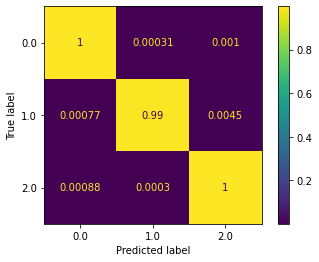

In [13]:
plot_confusion_matrix(model,X_test,y_test,normalize='true')

In [ ]:
#SVM performance
model = SVC(probability=(True),verbose=True)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("accuracy:", accuracy)
    
# Calculating the precision score
precision = precision_score(y_test, y_pred,labels=[0,1,2],average="macro")
print("precision:", precision)
    
# Calculating the recall score
recall = recall_score(y_test, y_pred,labels=[0,1,2],average="macro")
print("recall:", recall)
    
# Calculatig the F1 score
f1 = f1_score(y_test, y_pred,labels=[0,1,2],average="macro")
print("f1:", f1)

[LibSVM]

In [11]:
import torch.nn as nn
# number of features (len of X cols)
dim1 = 5
# number of hidden layers
hid = 25
# number of classes (unique of y)
output_dim = 3
class Network(nn.Module):
    def __init__(self):
        super(Network, self).__init__()
        self.linear1 = nn.Linear(dim1, hid)
        self.linear2 = nn.Linear(hid, output_dim)
    def forward(self, x):
        x = torch.sigmoid(self.linear1(x))
        x = self.linear2(x)
        x=torch.argmax(x)
        return x

In [ ]:
from torch.utils.data import TensorDataset, DataLoader
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_tem,p, test_size=0.5)

batch_size=32
trainData=tensorDataset(torch.tensor(X_train),torch.tensor(y_train))
trainloader = DataLoader(traindata, batch_size=batch_size, 
                         shuffle=True, num_workers=2)

In [ ]:
epochs = 8
running_loss = []
for epoch in range(epochs):

    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        # set optimizer to zero grad to remove previous epoch gradients
        optimizer.zero_grad()
        # forward propagation
        outputs = clf(inputs)
        loss = criterion(outputs, labels)
        # backward propagation
        loss.backward()
        # optimize
        optimizer.step()
        running_loss .append( loss.item())
        accuracy(y_pred,y_test)

In [12]:
#Final accuracy plot is hsown below

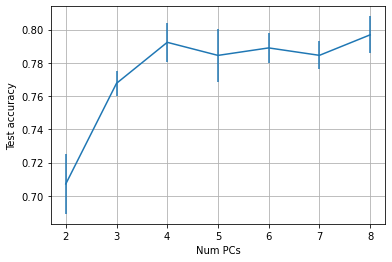